# Machine Learning Project : Binary Classification

#### CHILD-JAUVERT Victor - CLAIR Robin - DE ROMEMONT Charlotte - DUSSOLLE Antoine

NB : The accuracy scores obtained are biased by the fact that some of the information is held in memory by Jupyter, so the scores we get here are a bit higher than the scores we recorded the first time we ran this workflow.

In [33]:
# First we import all the functions we are going to use to apply the workflow, from the .py file
from ProjectFunctions import importData, cleanData, splitData, trainKnn, trainRfc, testModel 

## First case : Banknote Authentification Dataset 

### 1. Import the dataset

Import the data and display some information about it to get a better understanding of its structure.

In [34]:
# First case : Banknote
file = 'data_banknote_authentication.txt'

In [35]:
# Import the dataset and its main caracteristics
banknotes, banknotesShape, banknotesHead = importData(file)

In [36]:
print("The dataset has {} columns and {} rows".format(banknotesShape[1],banknotesShape[0]))

The dataset has 5 columns and 1371 rows


In [37]:
# Display the first rows of the dataset
banknotesHead

,variance,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### 2. Clean the data & perform preprocessing

In [38]:
# Clean the data (remove dirtiness, centralize, normalize, ...) and retrieve the ground truth vector
banknotes, y = cleanData(banknotes)

In [39]:
# Display the cleaned dataset
banknotes

,variance,skewness,curtosis,entropy
0,1.447493,1.065028,-0.895406,-0.128421
1,1.208301,-0.776322,0.121460,0.617909
2,1.064273,1.295995,-1.255629,-1.142989
3,-0.035944,-1.085931,0.735738,0.096779
4,1.385048,1.321386,-1.243890,-0.937487
...,...,...,...,...
1366,-0.008890,-0.096830,-0.661421,0.301049
1367,-0.640321,-1.157859,1.177861,0.729886
1368,-1.471141,-2.620159,3.756871,-0.754110
1369,-1.405494,-1.755199,2.550357,-0.042871


### 3. Split the dataset

In [40]:
# Split the dataset into 2 parts : a train set & a test set
X_train,X_test,y_train,y_test = splitData(banknotes,y)

### 4. Train models

Train 2 K-Nearest Neighbors (KNN) models, one with an arbitrarily chosen value of K and another one with the top performing value of K, in a given set of values, selected thanks to cross-validation.

In [41]:
# Train a first K-Nearest Neighbors (KNN) model with an arbitrarily chosen default number of neighbours (=5).
knn = trainKnn(X_train,y_train)

In [42]:
# Train another KNN model, but, this time, using cross-validation (with 10 folds) for the choice of K in [1,25].
import numpy as np
knn_gscv, best_params, best_score = trainKnn(X_train,y_train,crossval=True,n_neighbors=np.arange(1,25),cv=10)

# Display the top performing number of neigbor value & the mean score for the top performing number of neigbor value
print("The top performing value for K is {} with a mean score of {}".format(best_params['n_neighbors'],best_score))

The top performing value for K is 2 with a mean score of 0.9989583333333334


Train 2 Random Forest models, the second one being trained on a training set on which feature selection has been previously done.

In [43]:
# Train a Random Forest Classifier (RFC) with 1000 trees 
rfc = trainRfc(X_train,y_train)

The most relevant features are : ['variance', 'skewness', 'curtosis']


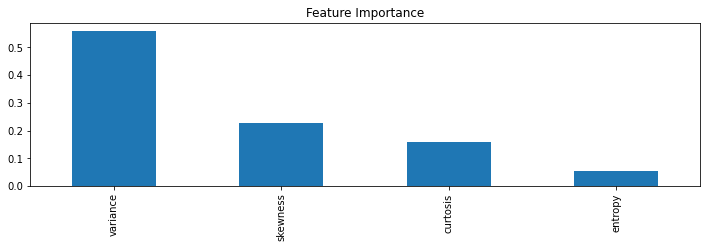

In [44]:
# Train a Random Forest Classifier model with feature selection done beforehead.
rfc_fs, X_test_fs = trainRfc(X_train,y_train,featureselection=True,t=0.15,X_test=X_test)

Feature selection is done on a first random forest classifier from which we extract the feature that were the most discriminant to produce a final random forest classifier only based on the most relevant features.

### 5. Validate the models

Display the accuracy scores for each model trained above. 

In [45]:
# Test the KNN model without the most accurate K value and display the main performance indicators
testModel(knn, X_test, y_test)

This is the classification report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.99      1.00      1.00       175

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

This is the accuracy score :  0.9975728155339806


In [46]:
# Test the KNN model  with the top performing value of K, in a given set of values,
# selected thanks to cross-validation and display the main performance indicators
testModel(knn_gscv, X_test, y_test)

This is the classification report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.99      1.00      1.00       175

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

This is the accuracy score :  0.9975728155339806


In [47]:
# Test the RFC model without feature selection and display the main performance indicators
testModel(rfc, X_test, y_test)

This is the classification report :                precision    recall  f1-score   support

           0       0.99      0.98      0.99       237
           1       0.98      0.99      0.98       175

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

This is the accuracy score :  0.9854368932038835


In [48]:
# Test the RFC model with feature selection performed on the training and testing sets
# and display the main performance indicators
testModel(rfc_fs, X_test_fs, y_test)

This is the classification report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       237
           1       0.98      0.99      0.99       175

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

This is the accuracy score :  0.9902912621359223


## Second case : Chronic Kidney Disease dataset

### 1. Import the dataset

Import the data and display some information about it to get a better understanding of its structure.

In [49]:
# Second case : Kidney Disease
file2 = 'kidney_disease.csv'

In [50]:
# Import the dataset and its main caracteristics
kidney, kidneyShape, kidneyHead = importData(file2)

In [51]:
print("The dataset has {} columns and {} rows".format(kidneyShape[1],kidneyShape[0]))

The dataset has 26 columns and 400 rows


In [52]:
# Display the first rows of the dataset
kidneyHead

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### 2. Clean the data & perform preprocessing

In [53]:
# Clean the data (remove dirtiness, centralize, normalize, label-encode ...) and retrieve the ground truth vector
kidney, y = cleanData(kidney)

In [54]:
# Display the cleaned dataset
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.205207,0.262010,0.482750,-0.013321,-0.437249,1,1,0,0,-0.361535,...,1.057946,0.627586,-0.240218,5.861676e-01,1,1,0,0,0,0
1,-2.620528,-1.964120,0.482750,2.344580,-0.437249,1,1,0,0,0.000000,...,-0.451531,-0.108513,-0.953592,-1.056960e-15,0,0,0,0,0,0
2,0.619537,0.262010,-1.379663,0.772646,2.476824,1,1,0,0,3.676836,...,-1.077412,-0.967295,-0.359114,-1.056960e-15,0,1,0,1,0,1
3,-0.205207,-0.480033,-2.310870,2.344580,-0.437249,1,0,1,0,-0.415023,...,-0.488348,-0.844612,-0.676169,-9.608725e-01,1,0,0,1,1,1
4,-0.028476,0.262010,-1.379663,0.772646,-0.437249,1,1,0,0,-0.562116,...,-0.341082,-0.476562,-0.438377,-1.278509e-01,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207165,0.262010,0.482750,-0.799289,-0.437249,1,1,0,0,-0.107465,...,1.168396,0.995635,-0.676169,2.291584e-01,0,0,0,0,0,0
396,-0.558668,-0.480033,1.413957,-0.799289,-0.437249,1,1,0,0,-0.976651,...,1.462928,1.854417,-0.240218,1.776199e+00,0,0,0,0,0,0
397,-2.325977,0.262010,0.482750,-0.799289,-0.437249,1,1,0,0,-0.642349,...,1.205212,1.241001,-0.715801,8.241738e-01,0,0,0,0,0,0
398,-2.031425,-1.222077,1.413957,-0.799289,-0.437249,1,1,0,0,-0.455139,...,0.616148,1.486367,-0.478009,1.419189e+00,0,0,0,0,0,0


### 3. Split the dataset

In [55]:
# Split the dataset into 2 parts : a train set & a test set
X_train, X_test, y_train, y_test = splitData(kidney,y)

### 4. Train models

Train 2 K-Nearest Neighbors (KNN) models, one with an arbitrarily chosen value of K and another one with the top performing value of K, in a given set of values, selected thanks to cross-validation.

In [56]:
# Train a first K-Nearest Neighbors (KNN) model with an arbitrarily chosen default number of neighbours (=5).
knn = trainKnn(X_train,y_train)

In [57]:
# Train another KNN model, but, this time, using cross-validation (with 10 folds) for the choice of K in [1,25].
import numpy as np
knn_gscv, best_params, best_score = trainKnn(X_train,y_train,crossval=True,n_neighbors=np.arange(1,25),cv=10)

# Display the top performing number of neigbor value & the mean score for the top performing number of neigbor value
print("The top performing value for K is {} with a mean score of {}".format(best_params['n_neighbors'],best_score))

The top performing value for K is 2 with a mean score of 0.9714285714285713


Train 2 Random Forest models, the second one being trained on a training set on which feature selection has been previously done.

In [58]:
# Train a Random Forest Classifier (RFC) with 1000 trees 
rfc = trainRfc(X_train,y_train)

The most relevant features are : ['sg', 'hemo', 'pcv']


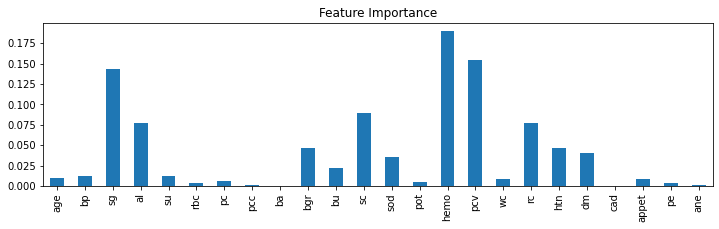

In [59]:
# Train a Random Forest Classifier model with feature selection done beforehead.
rfc_fs, X_test_fs = trainRfc(X_train,y_train,featureselection=True,t=0.14,X_test=X_test)

### 5. Validate the models

Display the accuracy scores for each model trained above. 

In [60]:
# Test the KNN model without the most accurate K value and display the main performance indicators
testModel(knn, X_test, y_test)

This is the classification report :                precision    recall  f1-score   support

         ckd       1.00      0.96      0.98        79
      notckd       0.93      1.00      0.96        41

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

This is the accuracy score :  0.975


In [61]:
# Test the KNN model  with the top performing value of K, in a given set of values,
# selected thanks to cross-validation and display the main performance indicators
testModel(knn_gscv, X_test, y_test)

This is the classification report :                precision    recall  f1-score   support

         ckd       0.99      0.99      0.99        79
      notckd       0.98      0.98      0.98        41

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

This is the accuracy score :  0.9833333333333333


In [62]:
# Test the RFC model without feature selection and display the main performance indicators
testModel(rfc, X_test, y_test)

This is the classification report :                precision    recall  f1-score   support

         ckd       0.99      1.00      0.99        79
      notckd       1.00      0.98      0.99        41

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

This is the accuracy score :  0.9916666666666667


In [63]:
# Test the RFC model with feature selection performed on the training and testing sets
# and display the main performance indicators
testModel(rfc_fs, X_test_fs, y_test)

This is the classification report :                precision    recall  f1-score   support

         ckd       0.96      1.00      0.98        79
      notckd       1.00      0.93      0.96        41

    accuracy                           0.97       120
   macro avg       0.98      0.96      0.97       120
weighted avg       0.98      0.97      0.97       120

This is the accuracy score :  0.975


We can see from the accuracy score above that the RFC model including feature selection slightly under performed the basic RFC model.
This might be due to a threshold on the feature importance too high, which resulted into not enough information retrieved from the data to predict kidney disease the most accurately.

Nonetheless, the accuracy score is still very good with much less data provided, so we can still conclude that feature selection is efficient and good solution when it comes to classification tasks on dataset with a high number of parameters.